[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/notebooks/example.ipynb)

In [1]:
# !pip install pygenomeviz
# !apt install ncbi-blast+

In [2]:
from pygenomeviz import GenomeViz
GenomeViz.clear_savefig = False

## Features

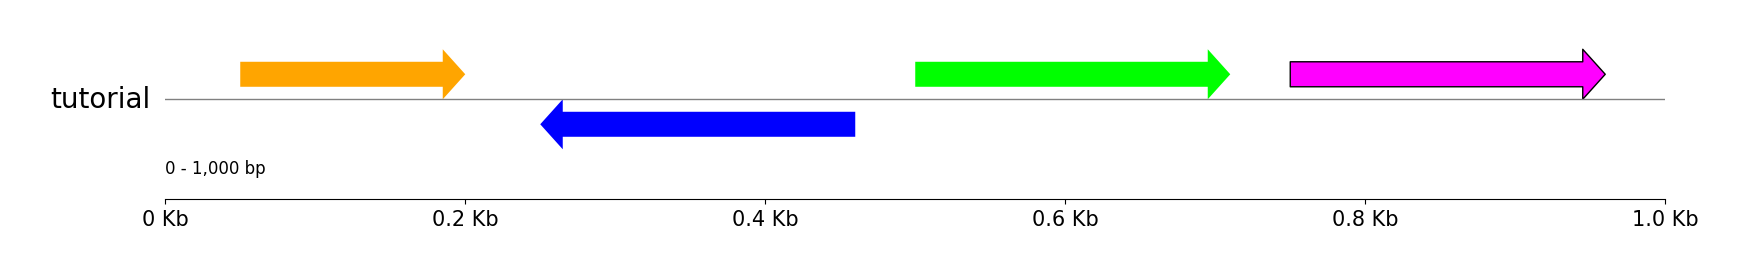

In [3]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("tutorial", 1000)
track.add_sublabel()

track.add_feature(50, 200, 1)
track.add_feature(250, 460, -1, fc="blue")
track.add_feature(500, 710, 1, fc="lime")
track.add_feature(750, 960, 1, fc="magenta", lw=1.0)

gv.savefig("features.png")

## Styled Features

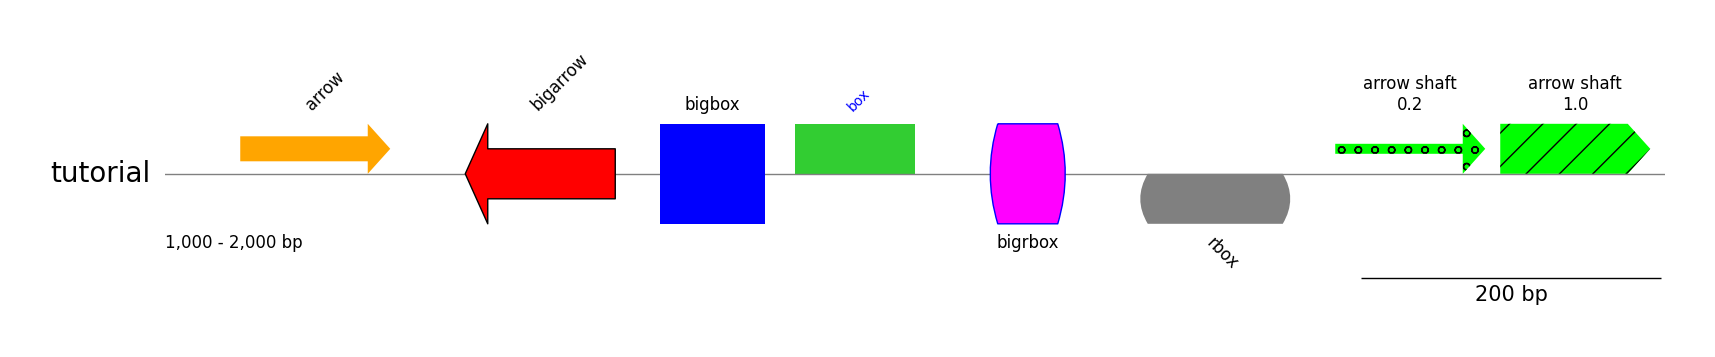

In [4]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

track = gv.add_feature_track("tutorial", (1000, 2000))
track.add_sublabel()

track.add_feature(1050, 1150, 1, label="arrow")
track.add_feature(1200, 1300, -1, plotstyle="bigarrow", label="bigarrow", fc="red", lw=1)
track.add_feature(1330, 1400, 1, plotstyle="bigbox", label="bigbox", fc="blue", text_kws=dict(rotation=0, hpos="center"))
track.add_feature(1420, 1500, 1, plotstyle="box", label="box", fc="limegreen", text_kws=dict(size=10, color="blue"))
track.add_feature(1550, 1600, 1, plotstyle="bigrbox", label="bigrbox", fc="magenta", ec="blue", lw=1, text_kws=dict(rotation=0, vpos="bottom", hpos="center"))
track.add_feature(1650, 1750, -1, plotstyle="rbox", label="rbox", fc="grey", text_kws=dict(rotation=-45, vpos="bottom"))
track.add_feature(1780, 1880, 1, fc="lime", hatch="o", arrow_shaft_ratio=0.2, label="arrow shaft\n0.2", text_kws=dict(rotation=0, hpos="center"))
track.add_feature(1890, 1990, 1, fc="lime", hatch="/", arrow_shaft_ratio=1.0, label="arrow shaft\n1.0", text_kws=dict(rotation=0, hpos="center"))

gv.savefig("styled_features.png")

## Tracks & Links

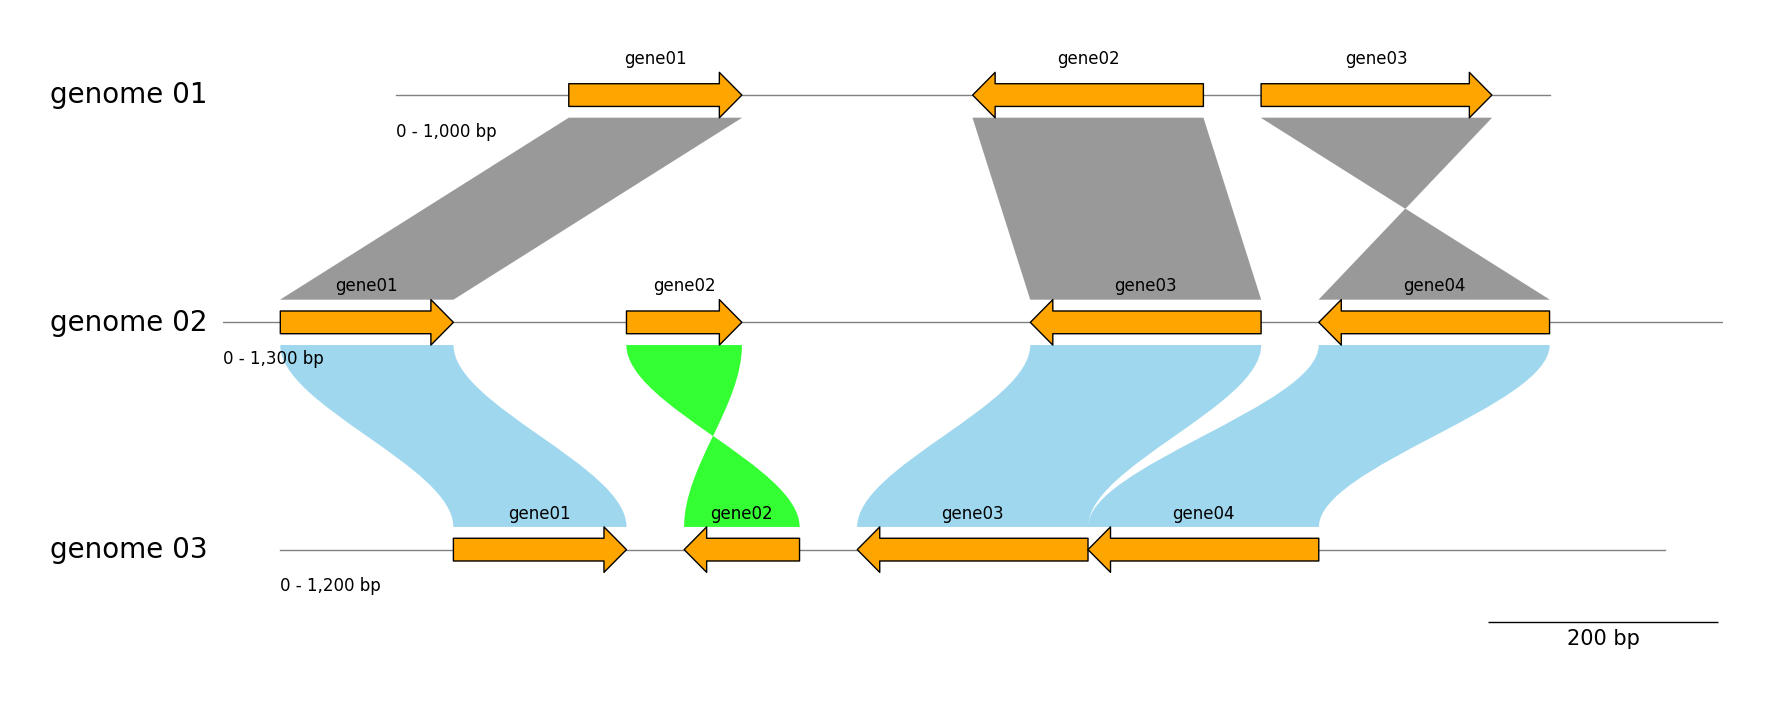

In [5]:
from pygenomeviz import GenomeViz

genome_list = [
    dict(name="genome 01", size=1000, features=((150, 300, 1), (500, 700, -1), (750, 950, 1))),
    dict(name="genome 02", size=1300, features=((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))),
    dict(name="genome 03", size=1200, features=((150, 300, 1), (350, 450, -1), (500, 700, -1), (700, 900, -1))),
]

gv = GenomeViz(track_align_type="center")
gv.set_scale_bar()

for genome in genome_list:
    name, size, features = genome["name"], genome["size"], genome["features"]
    track = gv.add_feature_track(name, size)
    track.add_sublabel()
    for idx, feature in enumerate(features, 1):
        start, end, strand = feature
        track.add_feature(start, end, strand, plotstyle="bigarrow", lw=1, label=f"gene{idx:02d}", text_kws=dict(rotation=0, vpos="top", hpos="center"))

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 03", 900, 700), ("genome 02", 1150, 950), color="skyblue", inverted_color="lime", curve=True)

gv.savefig("tracks_and_links.png")

## Exon Features

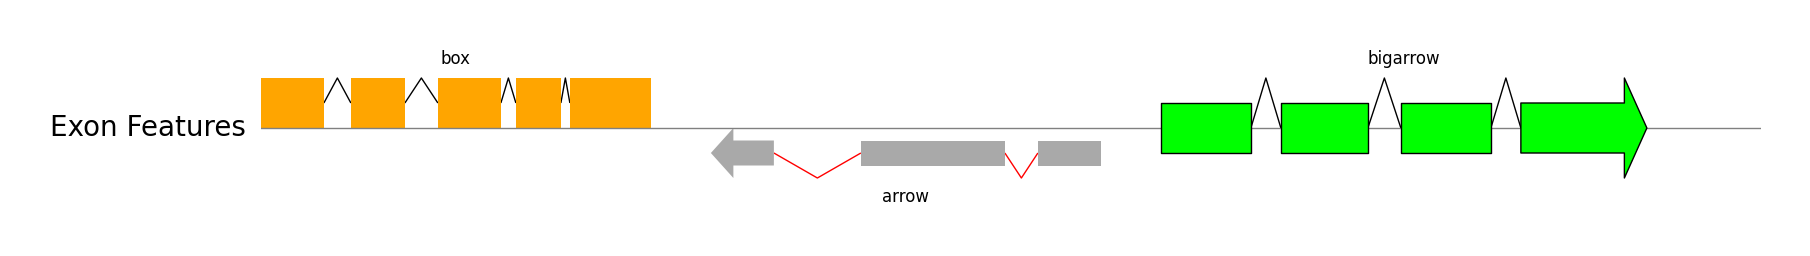

In [6]:
from pygenomeviz import GenomeViz

exon_regions1 = [(0, 210), (300, 480), (590, 800), (850, 1000), (1030, 1300)]
exon_regions2 = [(1500, 1710), (2000, 2480), (2590, 2800)]
exon_regions3 = [(3000, 3300), (3400, 3690), (3800, 4100), (4200, 4620)]

gv = GenomeViz()
track = gv.add_feature_track("Exon Features", 5000)
track.add_exon_feature(exon_regions1, strand=1, plotstyle="box", label="box", text_kws=dict(rotation=0, hpos="center"))
track.add_exon_feature(exon_regions2, strand=-1, plotstyle="arrow", label="arrow", text_kws=dict(rotation=0, vpos="bottom", hpos="center"), patch_kws=dict(fc="darkgrey"), intron_patch_kws=dict(ec="red"))
track.add_exon_feature(exon_regions3, strand=1, plotstyle="bigarrow", label="bigarrow", text_kws=dict(rotation=0, hpos="center"), patch_kws=dict(fc="lime", lw=1))

gv.savefig("exon_features.png")

## Genbank Features

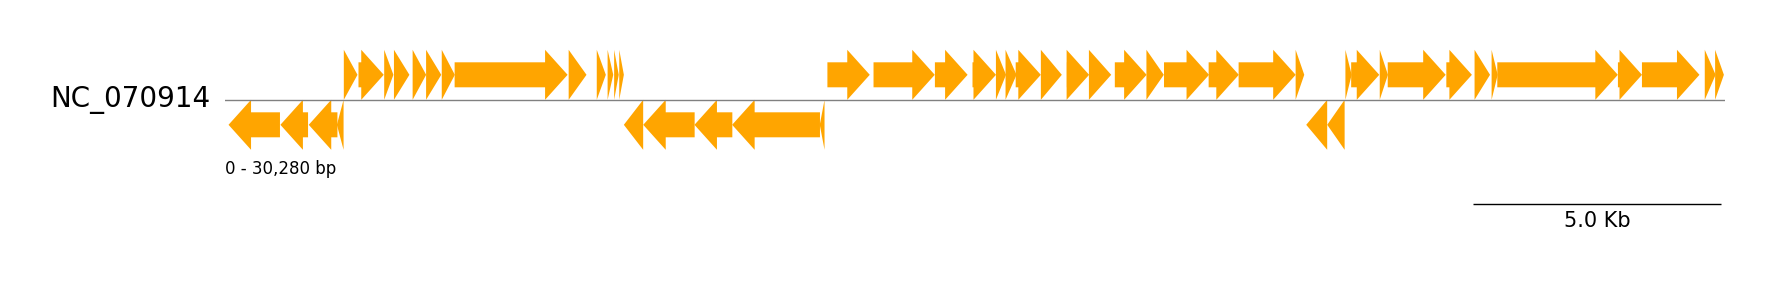

In [7]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk = Genbank(gbk_files[0])

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

track = gv.add_feature_track(gbk.name, gbk.genome_length)
track.add_sublabel()

features = gbk.extract_features()
track.add_features(features)

gv.savefig("genbank_features.png")

## GFF Features

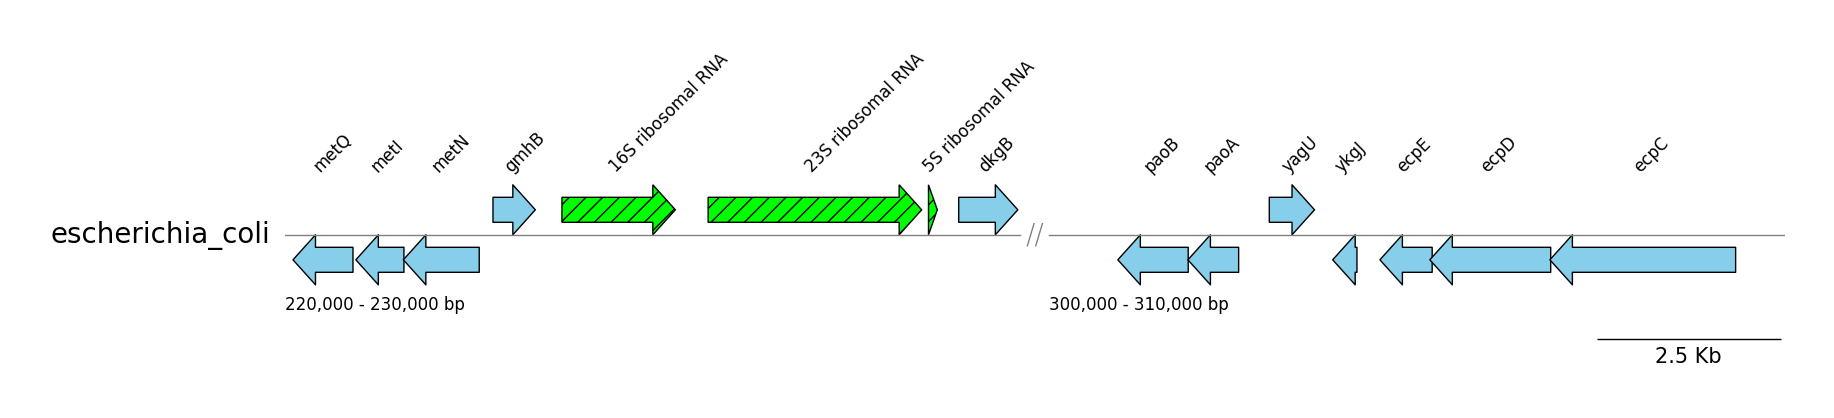

In [8]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file

gff_file = load_example_gff_file("escherichia_coli.gff.gz")
gff = Gff(gff_file)

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

target_ranges = ((220000, 230000), (300000, 310000))
track = gv.add_feature_track(name=gff.name, segments=target_ranges)
track.set_segment_sep(symbol="//")

for segment in track.segments:
    segment.add_sublabel()
    # Plot CDS features
    cds_features = gff.extract_features(feature_type="CDS", target_range=segment.range)
    segment.add_features(cds_features, label_type="gene", fc="skyblue", lw=1.0)
    # Plot rRNA features
    rrna_features = gff.extract_features(feature_type="rRNA", target_range=segment.range)
    segment.add_features(rrna_features, label_type="product", hatch="//", fc="lime", lw=1.0)

gv.savefig("gff_features.png")

## GFF Contigs

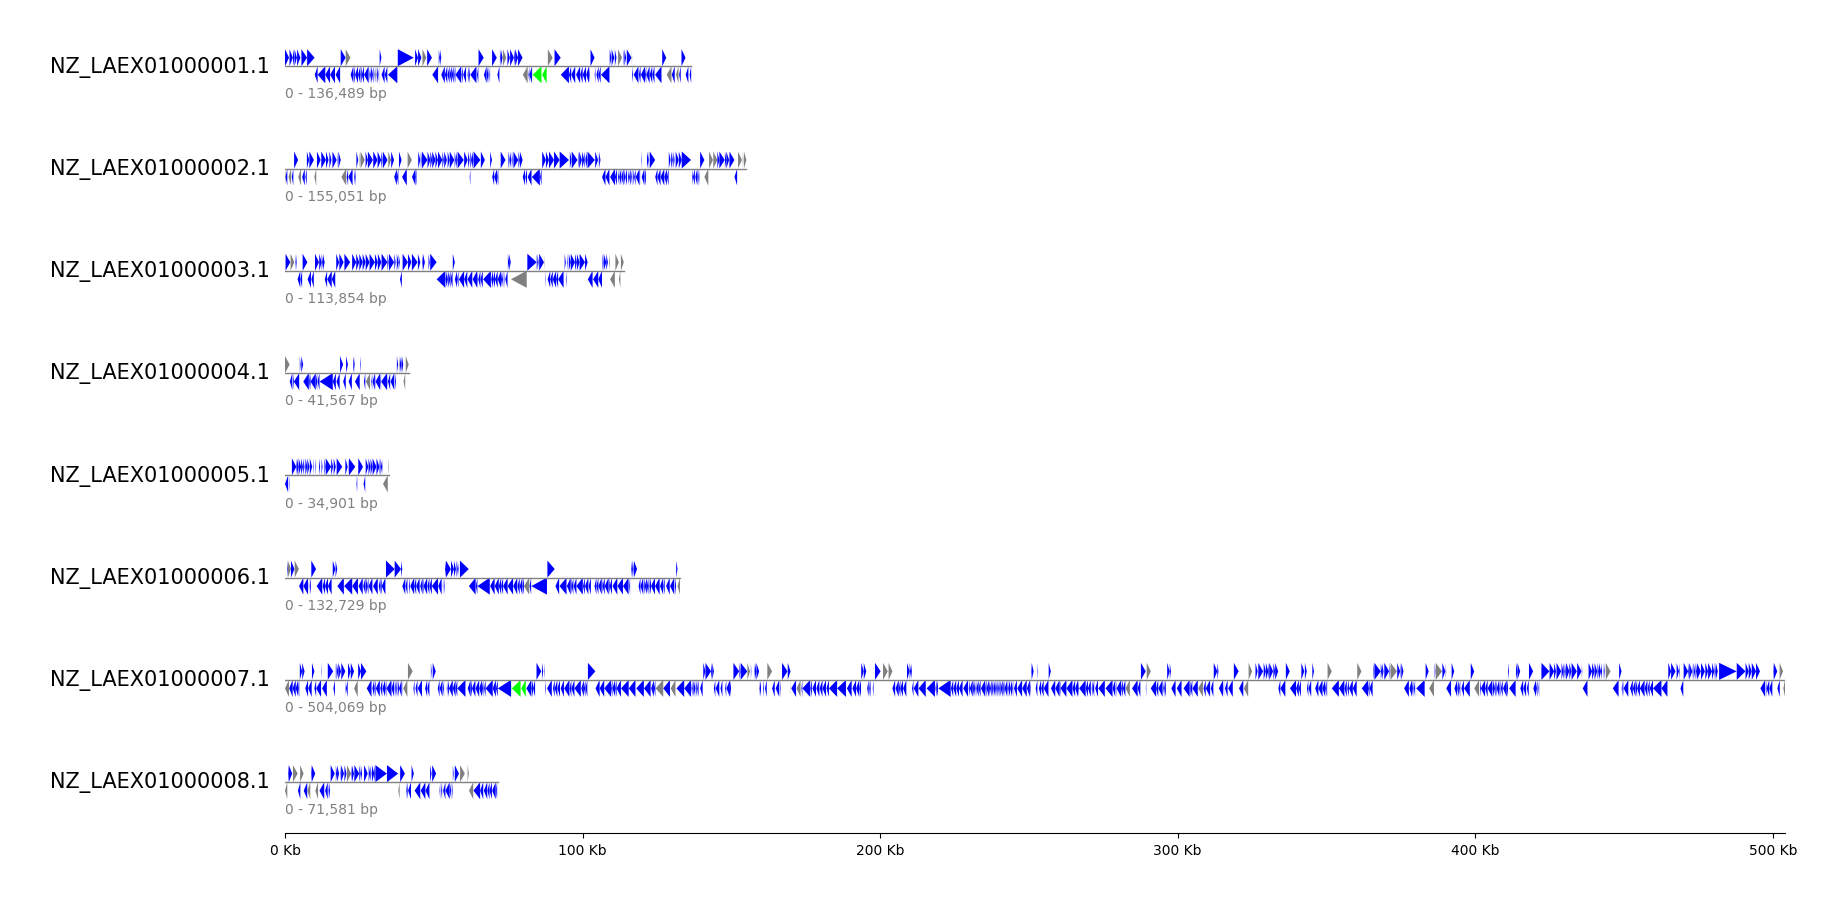

In [9]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file, is_pseudo_feature

gff_file = load_example_gff_file("mycoplasma_mycoides.gff")
gff = Gff(gff_file)

gv = GenomeViz(fig_track_height=0.5, feature_track_ratio=0.5)
gv.set_scale_xticks(labelsize=10)

# Plot CDS, rRNA features for each contig to tracks
for seqid, size in gff.get_seqid2size().items():
    track = gv.add_feature_track(seqid, size, labelsize=15)
    track.add_sublabel(size=10, color="grey")
    cds_features = gff.get_seqid2features(feature_type="CDS")[seqid]
    # CDS: blue, CDS(pseudo): grey
    for cds_feature in cds_features:
        color = "grey" if is_pseudo_feature(cds_feature) else "blue"
        track.add_features(cds_feature, color=color)
    # rRNA: lime
    rrna_features = gff.get_seqid2features(feature_type="rRNA")[seqid]
    track.add_features(rrna_features, color="lime")

gv.savefig("gff_contigs.png")

## Genbank Comparison by BLAST

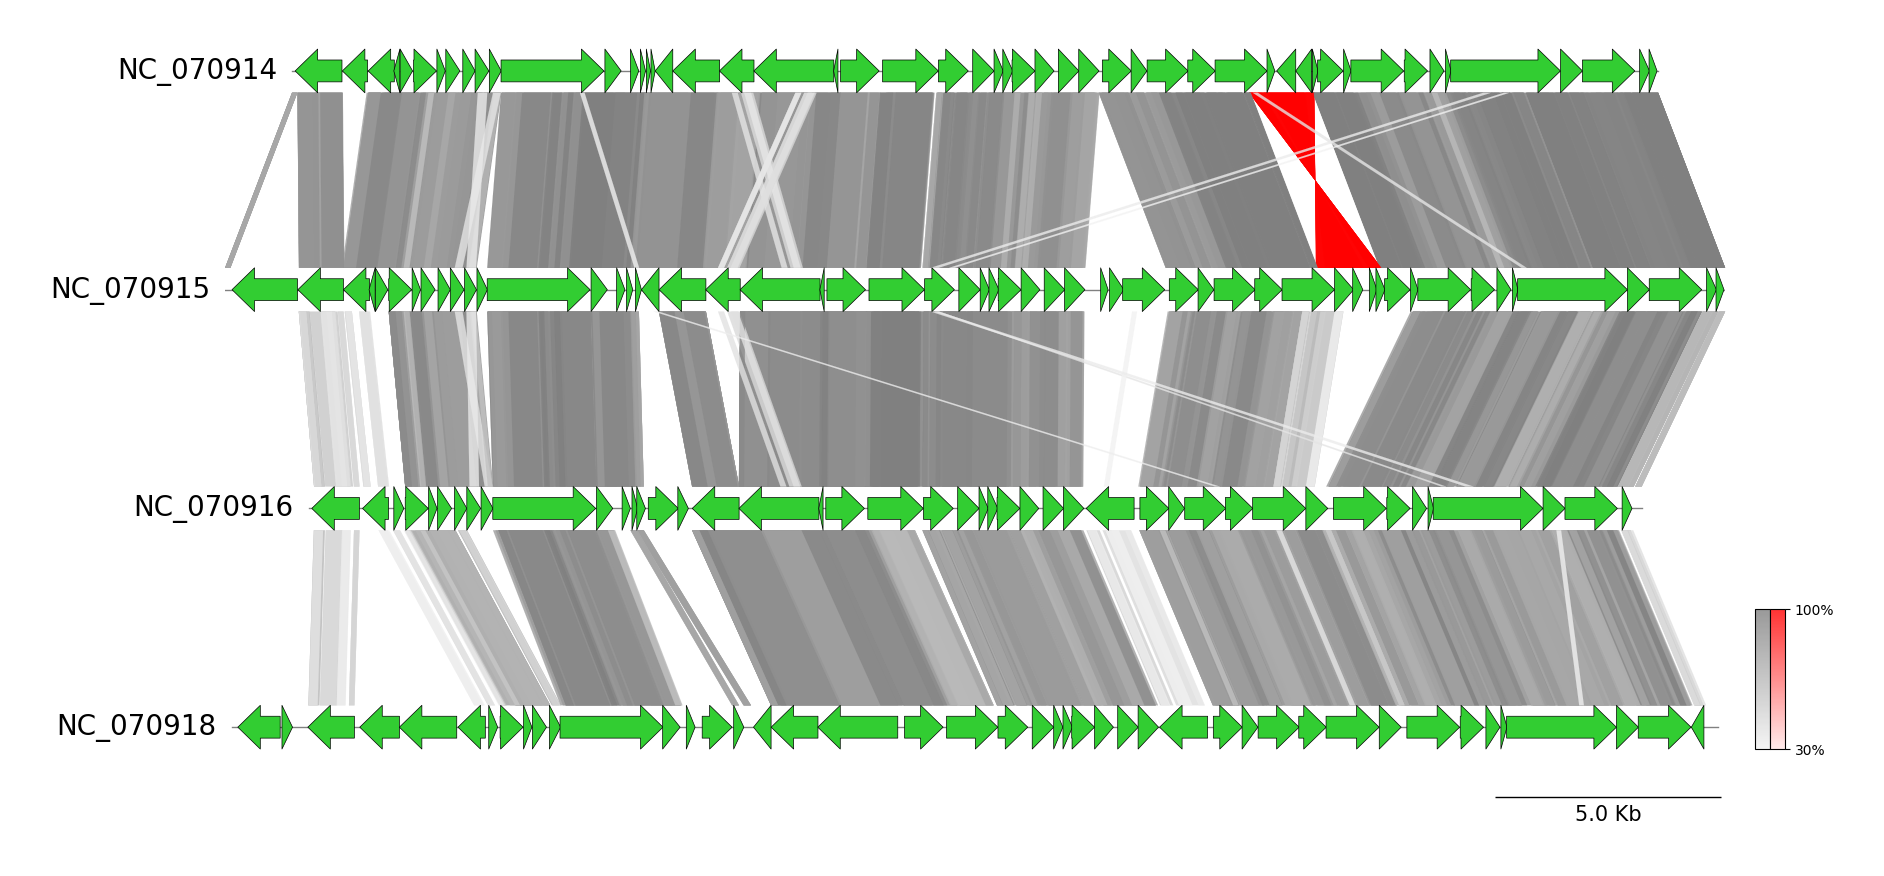

In [10]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import Blast, AlignCoord

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(track_align_type="center")
gv.set_scale_bar()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, plotstyle="bigarrow", fc="limegreen", lw=0.5)

# Run BLAST alignment & filter by user-defined threshold
align_coords = Blast(gbk_list, seqtype="protein").run()
align_coords = AlignCoord.filter(align_coords, length_thr=100, identity_thr=30)

# Plot BLAST alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

gv.savefig("genbank_comparison_by_blast.png")